<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_9/HOML_Chapter9_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [25]:
# !pip install yellowbrick

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

# Clustering

## Data

In [27]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

## Silhouette Score (KMeans)

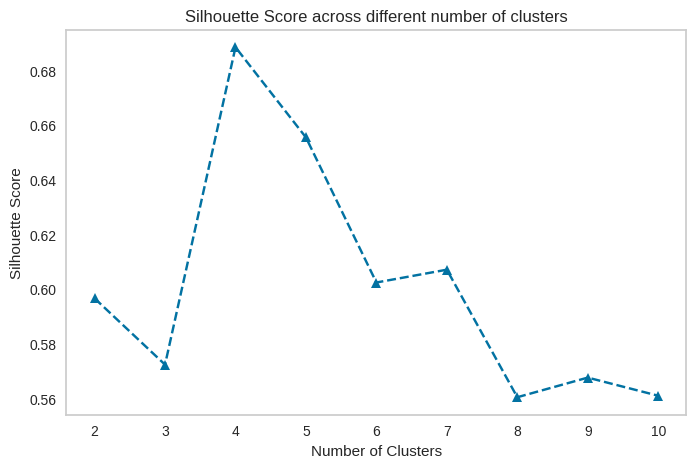

In [28]:
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, random_state=7)
  kmeans.fit(X)
  silhouette_scores.append(silhouette_score(X = X, labels = kmeans.labels_))
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(list(range(2, 11)), silhouette_scores, marker="^", linestyle="--")
ax.grid()
ax.set(
  xlabel="Number of Clusters", 
  ylabel="Silhouette Score", 
  title="Silhouette Score across different number of clusters"
)
plt.show()

Ref: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

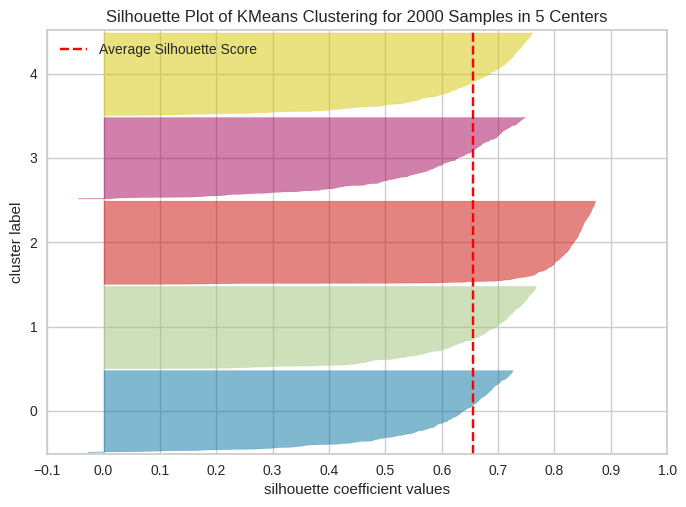

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
kmeans = KMeans(n_clusters = 5, random_state=7)
kmeans.fit(X)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Gaussian Mixture Models

## `GaussianMixture`

In [31]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [32]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [33]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [34]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [35]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [36]:
gm.converged_

True

In [37]:
gm.n_iter_

4

In [38]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [40]:
gm.predict_proba(X).round(3)

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.016],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

In [41]:
X_new, y_new = gm.sample(6)
X_new, y_new

(array([[-0.86944074, -0.32767626],
        [ 0.29836051,  0.28297011],
        [-2.8014927 , -0.09047309],
        [ 3.98203732,  1.49951491],
        [ 3.81677148,  0.53095244],
        [ 2.84104923, -0.73858639]]),
 array([0, 0, 1, 2, 2, 2]))

In [42]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

In [43]:
np.exp(gm.score_samples(X))

array([0.07370464, 0.02812483, 0.03579773, ..., 0.02979328, 0.01230209,
       0.02220439])

In [44]:
gm.bic(X)

8189.747000497186

In [45]:
gm.aic(X)

8102.521720382148

## `BayesianGausianMixture`

In [47]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [48]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])